<a href="https://colab.research.google.com/github/csnsnigdha18/Time-Series-Forecasting-and-Point-Anomaly-Detection-of-Sensor-Signals-Using-LSTM-Neural-Network-Arch/blob/main/Code/Bi-directional_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import math

from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM,Flatten
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.layers import ConvLSTM2D

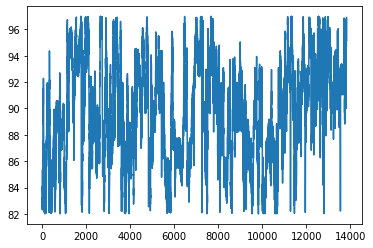

In [ ]:
# load the dataset
dataframe = read_csv('/content/good_machine_temperature_system_failure.csv', usecols=[0])
plt.plot(dataframe)


In [ ]:
#Convert pandas dataframe to numpy array
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

# Normalization is optional but recommended for neural network as certain
# activation functions are sensitive to magnitude of numbers.
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)

#We cannot use random way of splitting dataset into train and test as
#the sequence of events is important for time series.
#So let us take first 60% values for train and the remaining 1/3 for testing
# split into train and test sets
train_size = int(len(dataset) * 0.66)
gtest_size = len(dataset) - train_size
train, gtest = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator # Generates batches for sequence data
seq_size = length =  10
batch_size = 1
train_generator = TimeseriesGenerator(train,train,length=length,batch_size=batch_size)
print("Total number of samples in the original training data = ", len(train)) # 95
print("Total number of samples in the generated data = ", len(train_generator)) # 55

Total number of samples in the original training data =  9122
Total number of samples in the generated data =  9112


In [ ]:
x, y = train_generator[0]
validation_generator = TimeseriesGenerator(gtest, gtest, length=length ,batch_size=batch_size)


In [ ]:
num_features = 1

In [ ]:
#ConvLSTM

#train_generator = train_generator.reshape((train_generator.shape[0], 1, 1, 1, seq_size))
#validation_generator = validation_generator.reshape((validation_generator.shape[0], 1, 1, 1, seq_size))


#The layer expects input as a sequence of two-dimensional images,
#therefore the shape of input data must be: [samples, timesteps, rows, columns, features]
#model = Sequential()
#model.add(ConvLSTM2D(filters=64, kernel_size=(1,1), activation='relu', input_shape=(1,1,1, seq_size#)))
#model.add(Flatten())
#model.add(Dense(32))
#model.add(Dense(1))
#model.compile(optimizer='adam', loss='mean_squared_error')
#model.summary()

In [ ]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(length, num_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(32))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

#model.summary()
#print('Train...')

In [ ]:
model.fit_generator(generator=train_generator, verbose=2, epochs=10, validation_data=validation_generator)
trainPredict = model.predict(train_generator)
gtestPredict = model.predict(validation_generator)

trainPredict = scaler.inverse_transform(trainPredict)
trainY_inverse = scaler.inverse_transform(train)
gtestPredict = scaler.inverse_transform(gtestPredict)
gtestY_inverse = scaler.inverse_transform(gtest)
trainScore = math.sqrt(mean_squared_error(trainY_inverse[length:], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

gtestScore = math.sqrt(mean_squared_error(gtestY_inverse[length:], gtestPredict[:,0]))
print('Test Score: %.2f RMSE' % (gtestScore))

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


9112/9112 - 95s - loss: 0.0055 - val_loss: 0.0035 - 95s/epoch - 10ms/step
Epoch 2/10
9112/9112 - 87s - loss: 0.0042 - val_loss: 0.0044 - 87s/epoch - 10ms/step
Epoch 3/10
9112/9112 - 95s - loss: 0.0040 - val_loss: 0.0035 - 95s/epoch - 10ms/step
Epoch 4/10
9112/9112 - 95s - loss: 0.0038 - val_loss: 0.0034 - 95s/epoch - 10ms/step
Epoch 5/10
9112/9112 - 85s - loss: 0.0037 - val_loss: 0.0040 - 85s/epoch - 9ms/step
Epoch 6/10
9112/9112 - 86s - loss: 0.0036 - val_loss: 0.0039 - 86s/epoch - 9ms/step
Epoch 7/10
9112/9112 - 85s - loss: 0.0036 - val_loss: 0.0038 - 85s/epoch - 9ms/step
Epoch 8/10
9112/9112 - 95s - loss: 0.0035 - val_loss: 0.0036 - 95s/epoch - 10ms/step
Epoch 9/10
9112/9112 - 83s - loss: 0.0035 - val_loss: 0.0033 - 83s/epoch - 9ms/step
Epoch 10/10
9112/9112 - 98s - loss: 0.0034 - val_loss: 0.0033 - 98s/epoch - 11ms/step
4690/4690 [==============================] - 13s 3ms/step
Train Score: 0.83 RMSE
Test Score: 0.86 RMSE


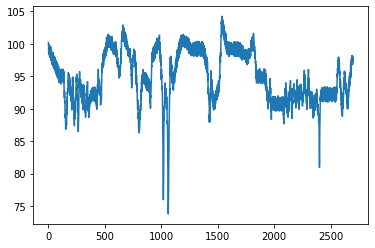

In [ ]:
dataframe = read_csv('/content/noisy_machine_temperature_system_failure.csv', usecols=[0])
plt.plot(dataframe)
dataset = dataframe.values
dataset = dataset.astype('float32') #COnvert values to float

# Normalization is optional but recommended for neural network as certain
# activation functions are sensitive to magnitude of numbers.
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1)) #Also try QuantileTransformer
dataset = scaler.fit_transform(dataset)
btest_size = int(len(dataset))
btest = dataset[0:btest_size,:]

In [ ]:
print(btest.shape)
btestPredict = model.predict(btest)
print(btestPredict .shape)
btestPredict = scaler.inverse_transform(btestPredict)
print(btestPredict .shape)
btestY_inverse = scaler.inverse_transform(btest)
print(btestY_inverse.shape)
btestScore = math.sqrt(mean_squared_error(btestPredict,btest))
print('Test Score: %.2f RMSE' % (btestScore))

(2696, 1)
85/85 [==============================] - 0s 2ms/step
(2696, 1)
(2696, 1)
(2696, 1)
Test Score: 92.19 RMSE
